# Task
Analyze the Titanic dataset by performing data loading and cleaning, exploratory data analysis, feature engineering, dimensionality reduction, and feature selection to identify features relevant to survival prediction. Use the dataset available through `seaborn.load_dataset("titanic")`.

## Data loading & cleaning

### Subtask:
Load the Titanic dataset, handle missing values, and remove duplicates.


**Reasoning**:
Load the titanic dataset from seaborn, display the missing values, fill missing values in 'age' and 'embarked' columns, drop the 'deck' column, and drop duplicate rows as per the instructions. Then display the missing values again and the shape of the dataframe.



In [ ]:
import seaborn as sns
import pandas as pd

# Load the dataset
df = sns.load_dataset("titanic")

# Display number of missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values in 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing values in 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop the 'deck' column
df.drop('deck', axis=1, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Display number of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

# Display the shape of the cleaned DataFrame
print("\nShape of the cleaned DataFrame:")
print(df.shape)

Missing values before handling:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Shape of the cleaned DataFrame:
(775, 14)


/tmp/ipython-input-721293209.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-721293209.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

## Exploratory data analysis (eda)

### Subtask:
Display summary statistics, show correlation matrix, and create plots for survival rate by gender and class, and age distribution.


**Reasoning**:
Display summary statistics, calculate the correlation matrix, and create plots for survival rate by gender and class, and age distribution as requested by the instructions.



,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.331388,-0.078114,-0.037841,0.069864,0.247159,-0.529158,-0.176714
pclass,-0.331388,1.000000,-0.342745,0.087050,0.038998,-0.554649,0.069762,0.113778
age,-0.078114,-0.342745,1.000000,-0.279316,-0.182697,0.092503,0.274454,0.190270
sibsp,-0.037841,0.087050,-0.279316,1.000000,0.379535,0.133807,-0.272326,-0.607809
parch,0.069864,0.038998,-0.182697,0.379535,1.000000,0.190823,-0.345630,-0.569387
fare,0.247159,-0.554649,0.092503,0.133807,0.190823,1.000000,-0.164481,-0.245168
adult_male,-0.529158,0.069762,0.274454,-0.272326,-0.345630,-0.164481,1.000000,0.384923
alone,-0.176714,0.113778,0.190270,-0.607809,-0.569387,-0.245168,0.384923,1.000000


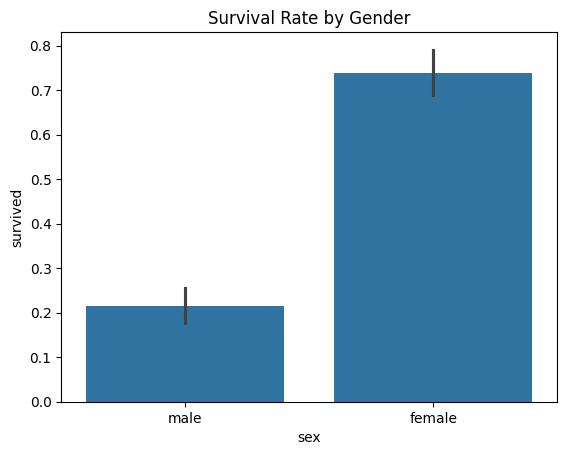

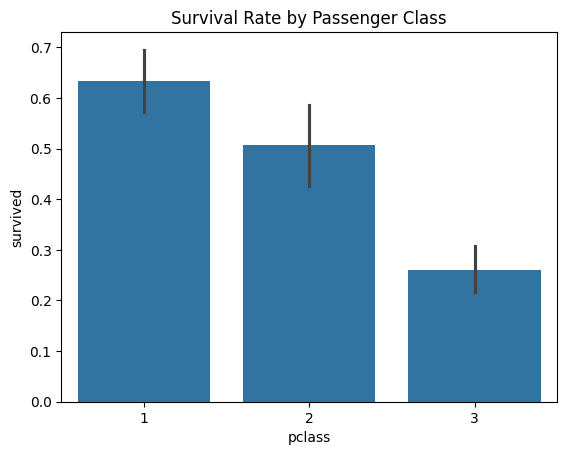

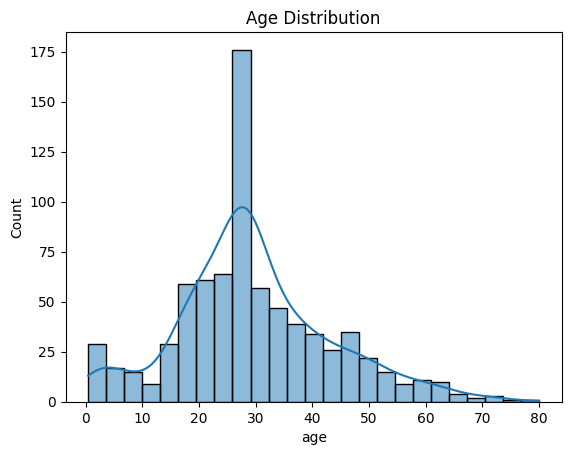

In [2]:
import matplotlib.pyplot as plt

# Display descriptive statistics
display(df.describe())

# Calculate and display the correlation matrix
display(df.corr(numeric_only=True))

# Create bar plot for survival rate by gender
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Create bar plot for survival rate by passenger class
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Create histogram for age distribution
sns.histplot(data=df, x='age', kde=True)
plt.title('Age Distribution')
plt.show()

**Reasoning**:
The previous command failed because `plt` was not imported. Import `matplotlib.pyplot` and run the plotting code again.



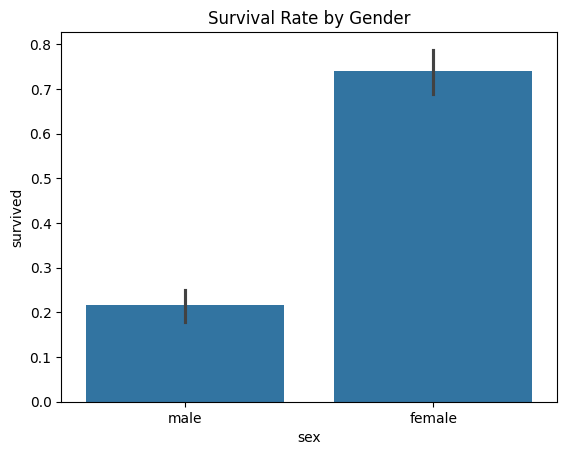

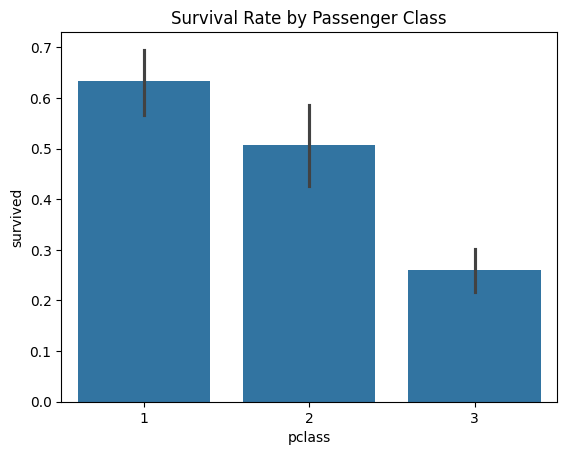

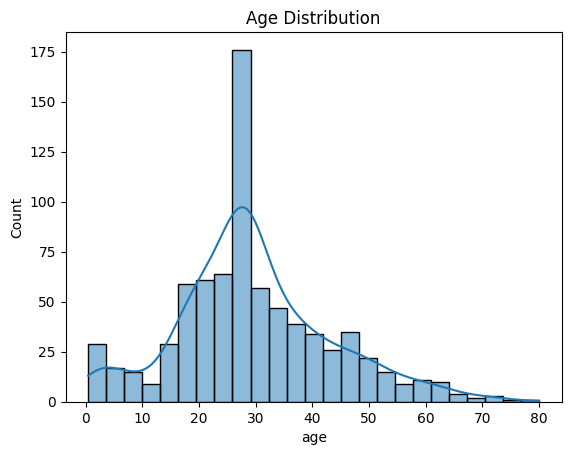

In [3]:
import matplotlib.pyplot as plt

# Create bar plot for survival rate by gender
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Create bar plot for survival rate by passenger class
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Create histogram for age distribution
sns.histplot(data=df, x='age', kde=True)
plt.title('Age Distribution')
plt.show()

## Feature engineering

### Subtask:
Convert categorical columns to numerical, create new derived features, and bin the age column.


**Reasoning**:
Convert 'sex' column to numerical, convert 'embarked' and 'embark_town' columns to numerical using one-hot encoding, create 'family_size' and 'is_alone' features, bin 'age' into 'age_group', and one-hot encode 'age_group'.



In [4]:
import numpy as np

# 1. Convert 'sex' to numerical
df['sex'] = np.where(df['sex'] == 'female', 0, 1)

# 2. Convert 'embarked' and 'embark_town' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['embarked', 'embark_town'], dummy_na=False)

# 3. Create 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1

# 4. Create 'is_alone'
df['is_alone'] = np.where(df['family_size'] == 1, 1, 0)

# 5. Create 'age_group' by binning 'age'
bins = [0, 12, 18, 60, np.inf]
labels = ['child', 'young_adult', 'adult', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# 6. Convert 'age_group' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['age_group'], dummy_na=False)

display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,family_size,is_alone,age_group_child,age_group_young_adult,age_group_adult,age_group_senior
0,0,3,1,22.0,1,0,7.2500,Third,man,True,...,True,False,False,True,2,0,False,False,True,False
1,1,1,0,38.0,1,0,71.2833,First,woman,False,...,False,True,False,False,2,0,False,False,True,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,...,True,False,False,True,1,1,False,False,True,False
3,1,1,0,35.0,1,0,53.1000,First,woman,False,...,True,False,False,True,2,0,False,False,True,False
4,0,3,1,35.0,0,0,8.0500,Third,man,True,...,True,False,False,True,1,1,False,False,True,False


## Dimensionality reduction

### Subtask:
Standardize numerical features and apply PCA to reduce dimensions.


**Reasoning**:
Import the necessary libraries for standardization and PCA, identify numerical columns, standardize them, and apply PCA. Then, create a new DataFrame for the PCA results.



In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Identify numerical columns suitable for standardization
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary and one-hot encoded columns from standardization
exclude_cols = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'family_size', 'is_alone'] + [col for col in df.columns if 'embarked_' in col or 'embark_town_' in col or 'age_group_' in col]
numerical_cols_to_scale = [col for col in numerical_cols if col not in exclude_cols]

# Instantiate and fit the StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols_to_scale])

# Instantiate and fit the PCA model
pca = PCA(n_components=2) # Using 2 components for visualization purposes
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame from the PCA-transformed data
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Display the first few rows of the PCA-transformed DataFrame
display(df_pca.head())

,PC1,PC2
0,-0.762667,-0.016649
1,0.924210,-0.058790
2,-0.547962,0.179830
3,0.524525,0.032508
4,-0.083692,0.640725


**Reasoning**:
Concatenate the PCA-transformed data with the non-numerical/binary features from the original DataFrame.



In [6]:
# Identify non-numerical/binary columns to concatenate
non_numerical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
binary_and_one_hot_cols = [col for col in df.columns if col in exclude_cols]

# Concatenate the PCA-transformed data with the non-numerical/binary features
df_processed = pd.concat([df_pca, df[non_numerical_cols + binary_and_one_hot_cols].reset_index(drop=True)], axis=1)

# Display the first few rows of the concatenated DataFrame
display(df_processed.head())

,PC1,PC2,class,who,adult_male,alive,alone,embarked_C,embarked_Q,embarked_S,...,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,family_size,is_alone,age_group_child,age_group_young_adult,age_group_adult,age_group_senior
0,-0.762667,-0.016649,Third,man,True,no,False,False,False,True,...,True,False,False,True,2,0,False,False,True,False
1,0.924210,-0.058790,First,woman,False,yes,False,True,False,False,...,False,True,False,False,2,0,False,False,True,False
2,-0.547962,0.179830,Third,woman,False,yes,True,False,False,True,...,True,False,False,True,1,1,False,False,True,False
3,0.524525,0.032508,First,woman,False,yes,False,False,False,True,...,True,False,False,True,2,0,False,False,True,False
4,-0.083692,0.640725,Third,man,True,no,True,False,False,True,...,True,False,False,True,1,1,False,False,True,False


## Feature selection

### Subtask:
Use SelectKBest to select the top 5 features for survival prediction.


**Reasoning**:
SelectKBest requires numerical features. The current `df` dataframe contains both numerical and non-numerical columns. I need to identify and select only the numerical columns to be used as features (X). The target variable (y) is the 'survived' column. I will exclude the 'survived' column from the features set as it is the target.



In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define features (X) and target variable (y)
X = df.select_dtypes(include=np.number).drop('survived', axis=1)
y = df['survived']

# Instantiate SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest
selector.fit(X, y)

# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

# Print the names of selected features
print("Top 5 features for survival prediction:")
print(selected_features)

Top 5 features for survival prediction:
Index(['pclass', 'sex', 'age', 'fare', 'is_alone'], dtype='object')


## Summary:

### Data Analysis Key Findings

*   Missing values in 'age' and 'embarked' were successfully handled, and the 'deck' column was dropped.
*   After cleaning, the dataset contained 775 rows and 14 columns.
*   Survival rate was significantly higher for females compared to males and generally decreased with lower passenger class.
*   The age distribution showed a peak in the adult range.
*   Categorical features ('sex', 'embarked', 'embark\_town', 'age\_group') were successfully converted to numerical representations through binary encoding and one-hot encoding.
*   New features 'family\_size' and 'is\_alone' were created.
*   Numerical features (excluding binary/one-hot encoded ones) were standardized, and PCA was applied to reduce dimensions to 2 components.
*   The top 5 features most relevant for survival prediction, as identified by `SelectKBest` using `f_classif`, are 'pclass', 'sex', 'age', 'fare', and 'is\_alone'.

### Insights or Next Steps

*   The identified top features ('pclass', 'sex', 'age', 'fare', 'is\_alone') should be used for building predictive models for survival on the Titanic.
*   Further analysis could involve visualizing the PCA-transformed data to see if there are visible clusters related to survival.


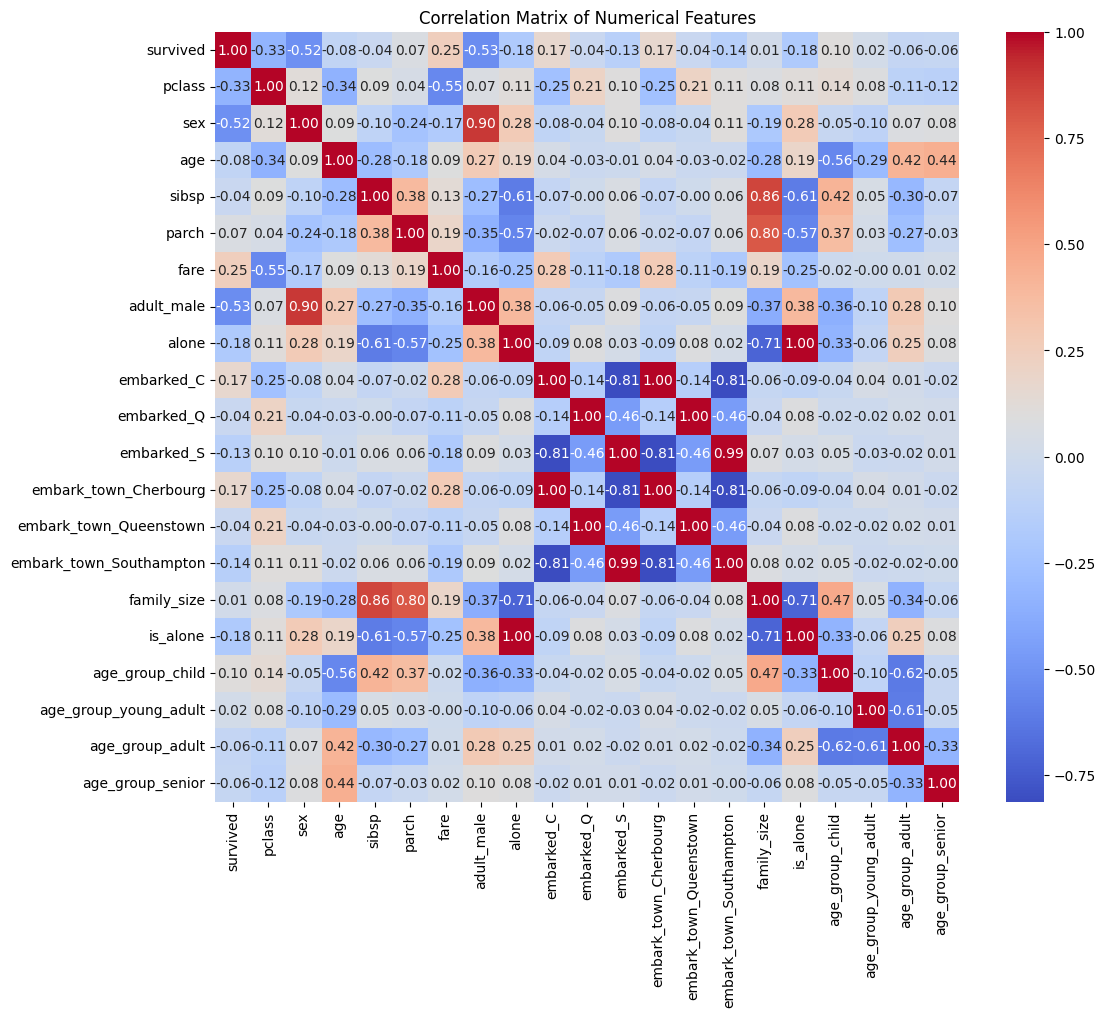

In [8]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()